
# <span style="color:rgb(213,80,0)">Compare IF of different location estimators (use bdp=0.5 or eff=0.95).</span>

This file creates Figures 2.16 and 2.17.

## Beginning of code

In [1]:
close all
clear
FontSize=14;
FontSizetitl=12;
LineWidth=2;
linst=repmat({'-';'--';':';'-.';'--';':'},3,1);
dd=100;

% k = supCVC parameter in HYP link
k=4.5;

x=(-7:0.001:7)';

xlim1=min(x);
xlim2=max(x);

## Prepare input for Figure 2.16

In [2]:
% Fix bdp to 0.5
bdp=0.5;

ylim1=-4.1;
ylim2=4.1;

cHA=HAbdp(bdp,1);
cTB=TBbdp(bdp,1);
[cHYP,A,B,d]=HYPbdp(bdp,1,k);

Effective tolerance in routine HYPbdp=1.6731e-07

In [3]:
cOPT=OPTbdp(bdp,1);
cPD=PDbdp(bdp);

% iHU =integral(@(u)u.*(HUpsider(u,cHU)).*normpdf(u),-dd,dd);
iHA =integral(@(u)(HApsider(u,cHA)).*normpdf(u),-dd,dd);
iTB =integral(@(u)(TBpsider(u,cTB)).*normpdf(u),-dd,dd);
iHYP=integral(@(u)(HYPpsider(u,[cHYP,k,A,B,d])).*normpdf(u),-dd,dd);
iOPT=integral(@(u)(OPTpsider(u,cOPT)).*normpdf(u),-dd,dd);
iPD =integral(@(u)(PDpsider(u,cPD)).*normpdf(u),-dd,dd);

## Create Figure 2.16

plot iF for different location estimators



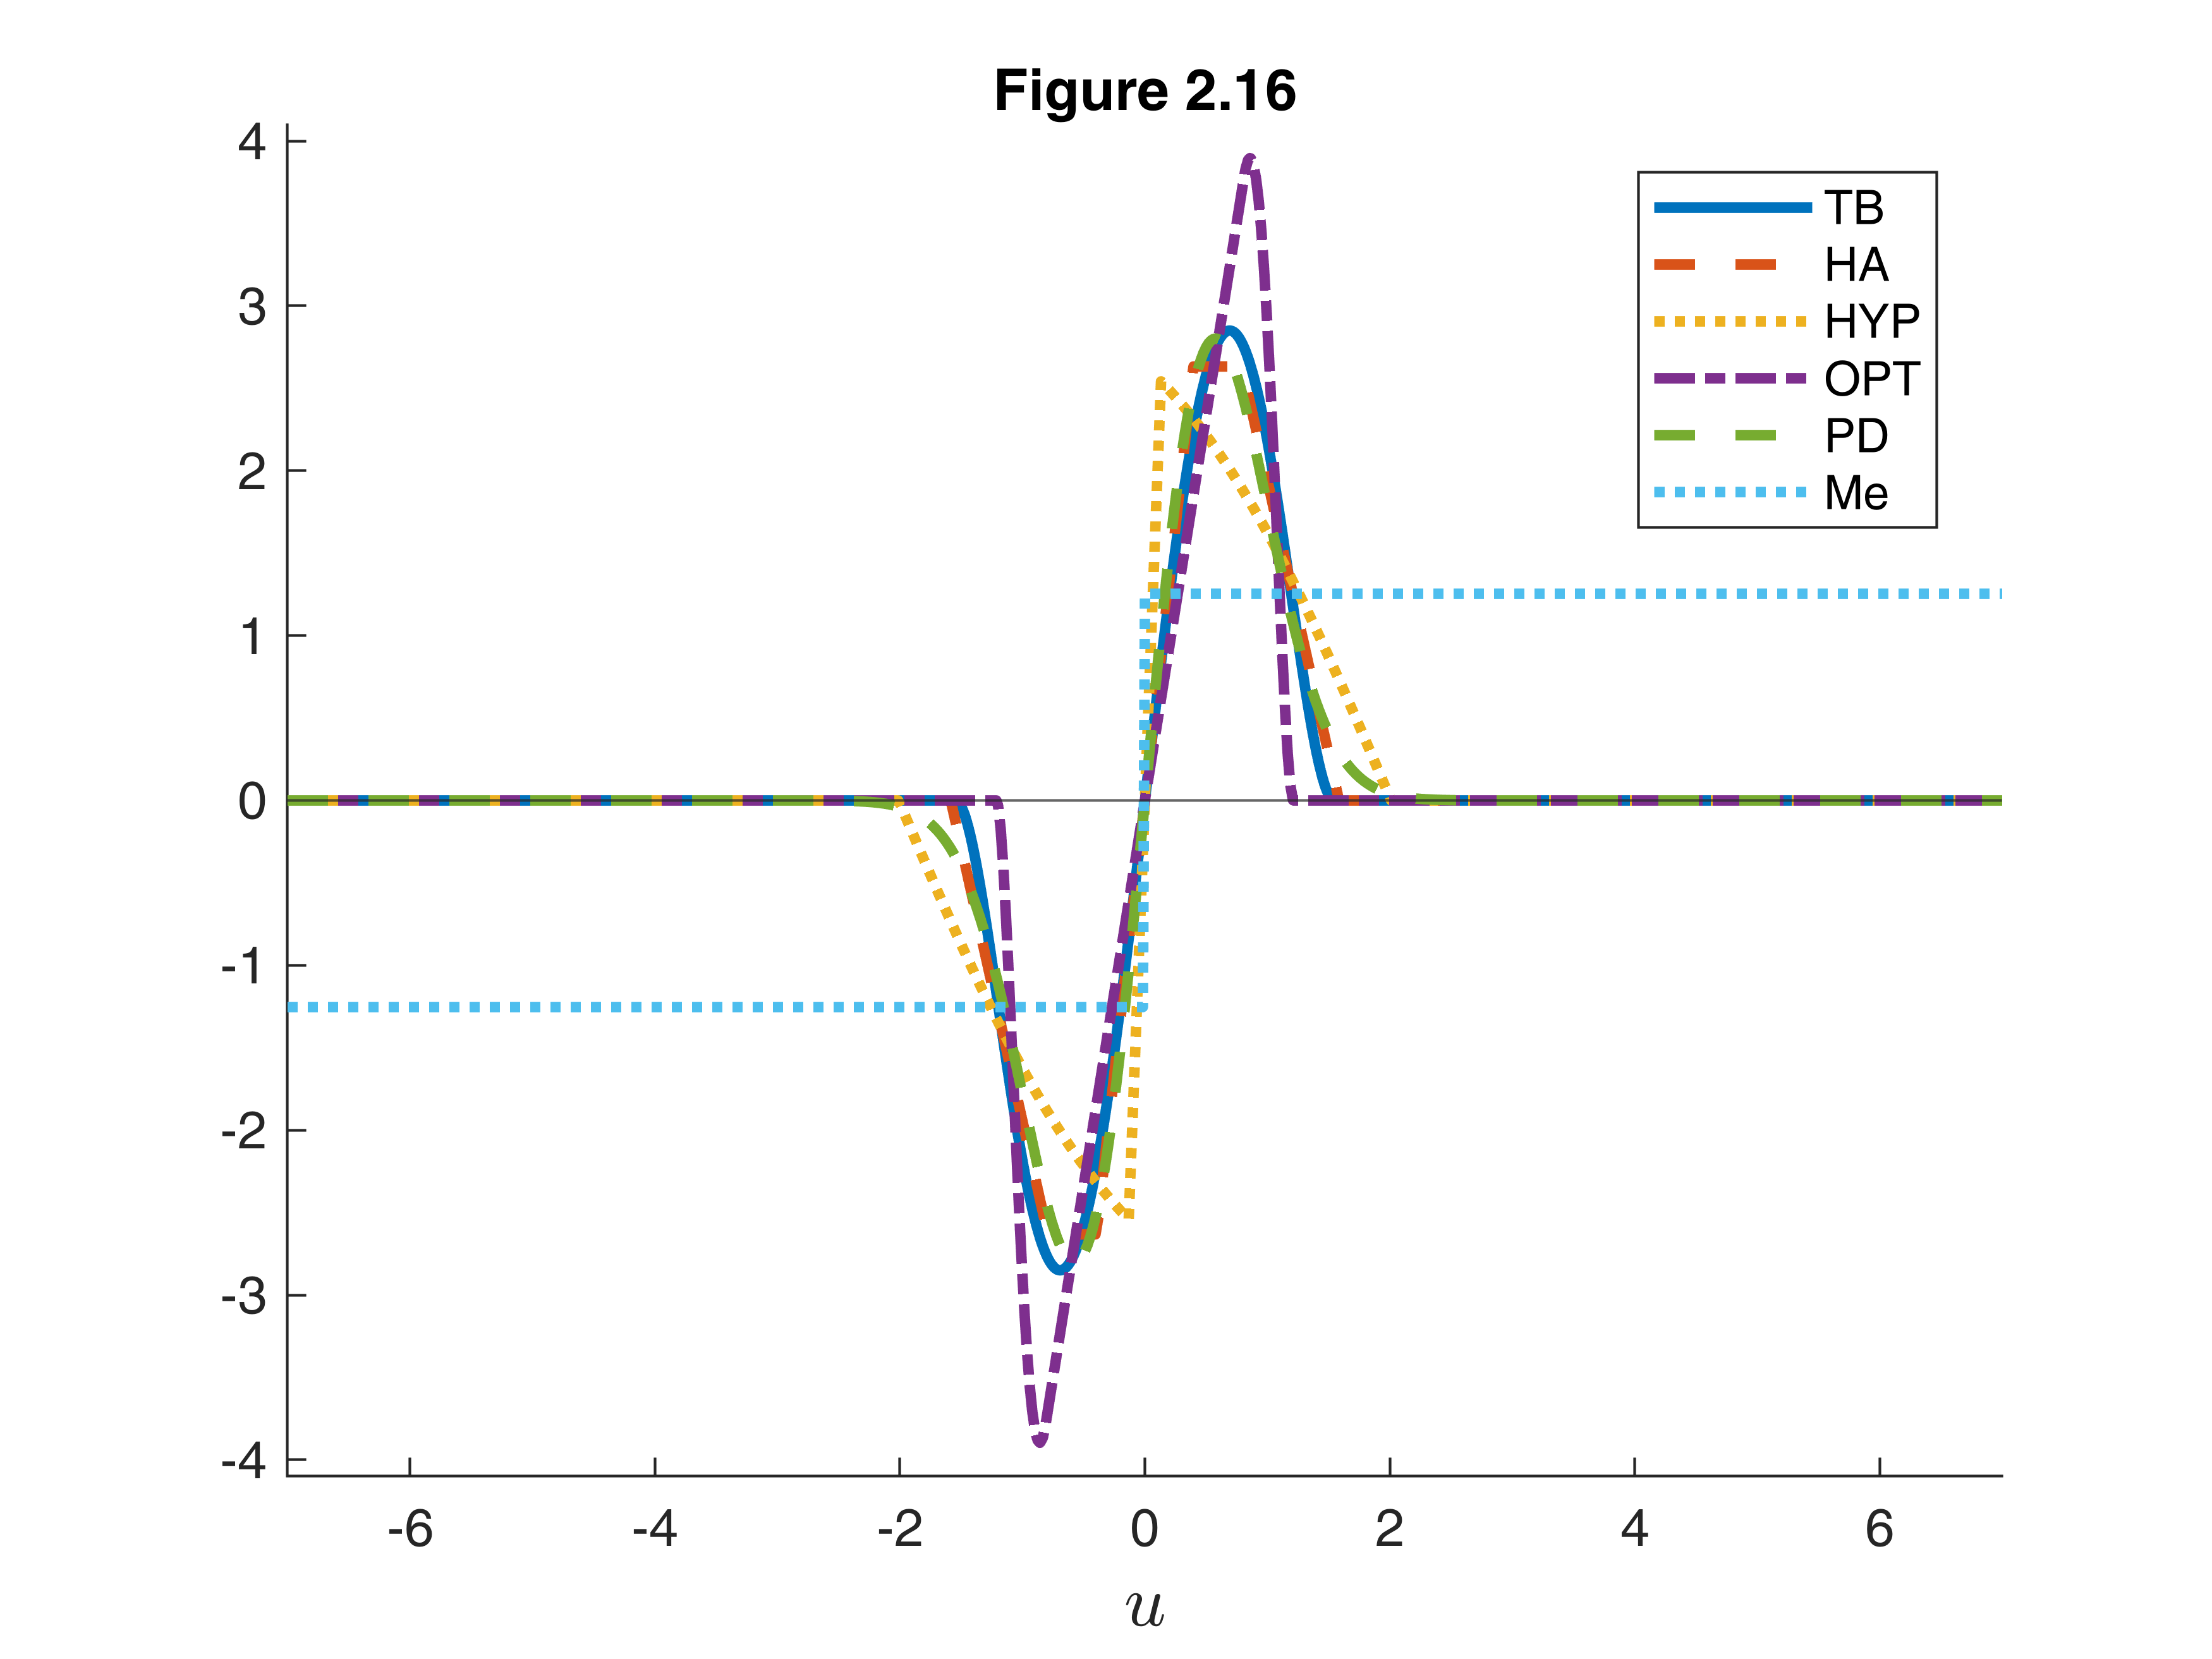

In [4]:
hold('on')

ifTB=(TBpsi(x,cTB))/iTB;
plot(x,ifTB,'LineWidth',LineWidth,'LineStyle',linst{1})

ifHA=(HApsi(x,cHA))/iHA;
plot(x,ifHA,'LineWidth',LineWidth,'LineStyle',linst{2})

ifHYP=(HYPpsi(x,[cHYP,k,A,B,d]))/iHYP;
plot(x,ifHYP,'LineWidth',LineWidth,'LineStyle',linst{3})

ifOPT=(OPTpsi(x,cOPT))/iOPT;
plot(x,ifOPT,'LineWidth',LineWidth,'LineStyle',linst{4})

ifPD=(PDpsi(x,cPD))/iPD;
plot(x,ifPD,'LineWidth',LineWidth,'LineStyle',linst{5})

xlabel(' $u$ ','Interpreter','Latex','FontSize',FontSize)

y= sqrt(2*pi)*sign(x)/2;
plot(x,y,'LineWidth',LineWidth,'LineStyle',linst{6})
ylim([ylim1 ylim2])
legend(["TB" "HA"  "HYP"  "OPT" "PD" "Me"],'Location','best','AutoUpdate','off')

% Table 2.1, column 2
GESlocbdp050=max([y ifTB ifHA ifHYP ifOPT ifPD])';

xlim([xlim1 xlim2])
yline(0)
title('Figure 2.16')
set(gcf,"Name",'Figure 2.16')

In [5]:

prin=0;
if prin==1
    % print to postscript
    print -depsc IFlocbdp05.eps;
end

## Prepare input for Figure 2.17

In [6]:
eff=0.95;

% Fix eff to 0.95 and find corresponding bdp
cHA=HAeff(eff,1);
[bdpHA,efftest]=HAc(cHA,1);
assert(abs(eff-efftest)<1e-5,"Lack of convergence on HA")

[cHYP,A,B,d]=HYPeff(eff,1,k);
[bdpHYP,efftest]=HYPc(cHYP,1,'k',k);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in HYP")

cOPT=OPTeff(eff,1);
[bdpOPT,efftest]=OPTc(cOPT,1);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in OPT")

cPD=PDeff(eff);
[bdpPD,efftest]=PDc(cPD);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in PD")

cTB=TBeff(eff,1);
[bdpTB,efftest]=TBc(cTB,1);
assert(abs(eff-efftest)<1e-5,"Lack of convergence in TB")

% cOPT=cOPT/3;

% iHU =integral(@(u)u.*(HUpsider(u,cHU)).*normpdf(u),-dd,dd);
iHA =integral(@(u)(HApsider(u,cHA)).*normpdf(u),-dd,dd);
iTB =integral(@(u)(TBpsider(u,cTB)).*normpdf(u),-dd,dd);
iHYP=integral(@(u)(HYPpsider(u,[cHYP,k,A,B,d])).*normpdf(u),-dd,dd);
iOPT=integral(@(u)(OPTpsider(u,cOPT)).*normpdf(u),-dd,dd);
iPD =integral(@(u)(PDpsider(u,cPD)).*normpdf(u),-dd,dd);

## Create Figure 2.17 (fix efficiency)


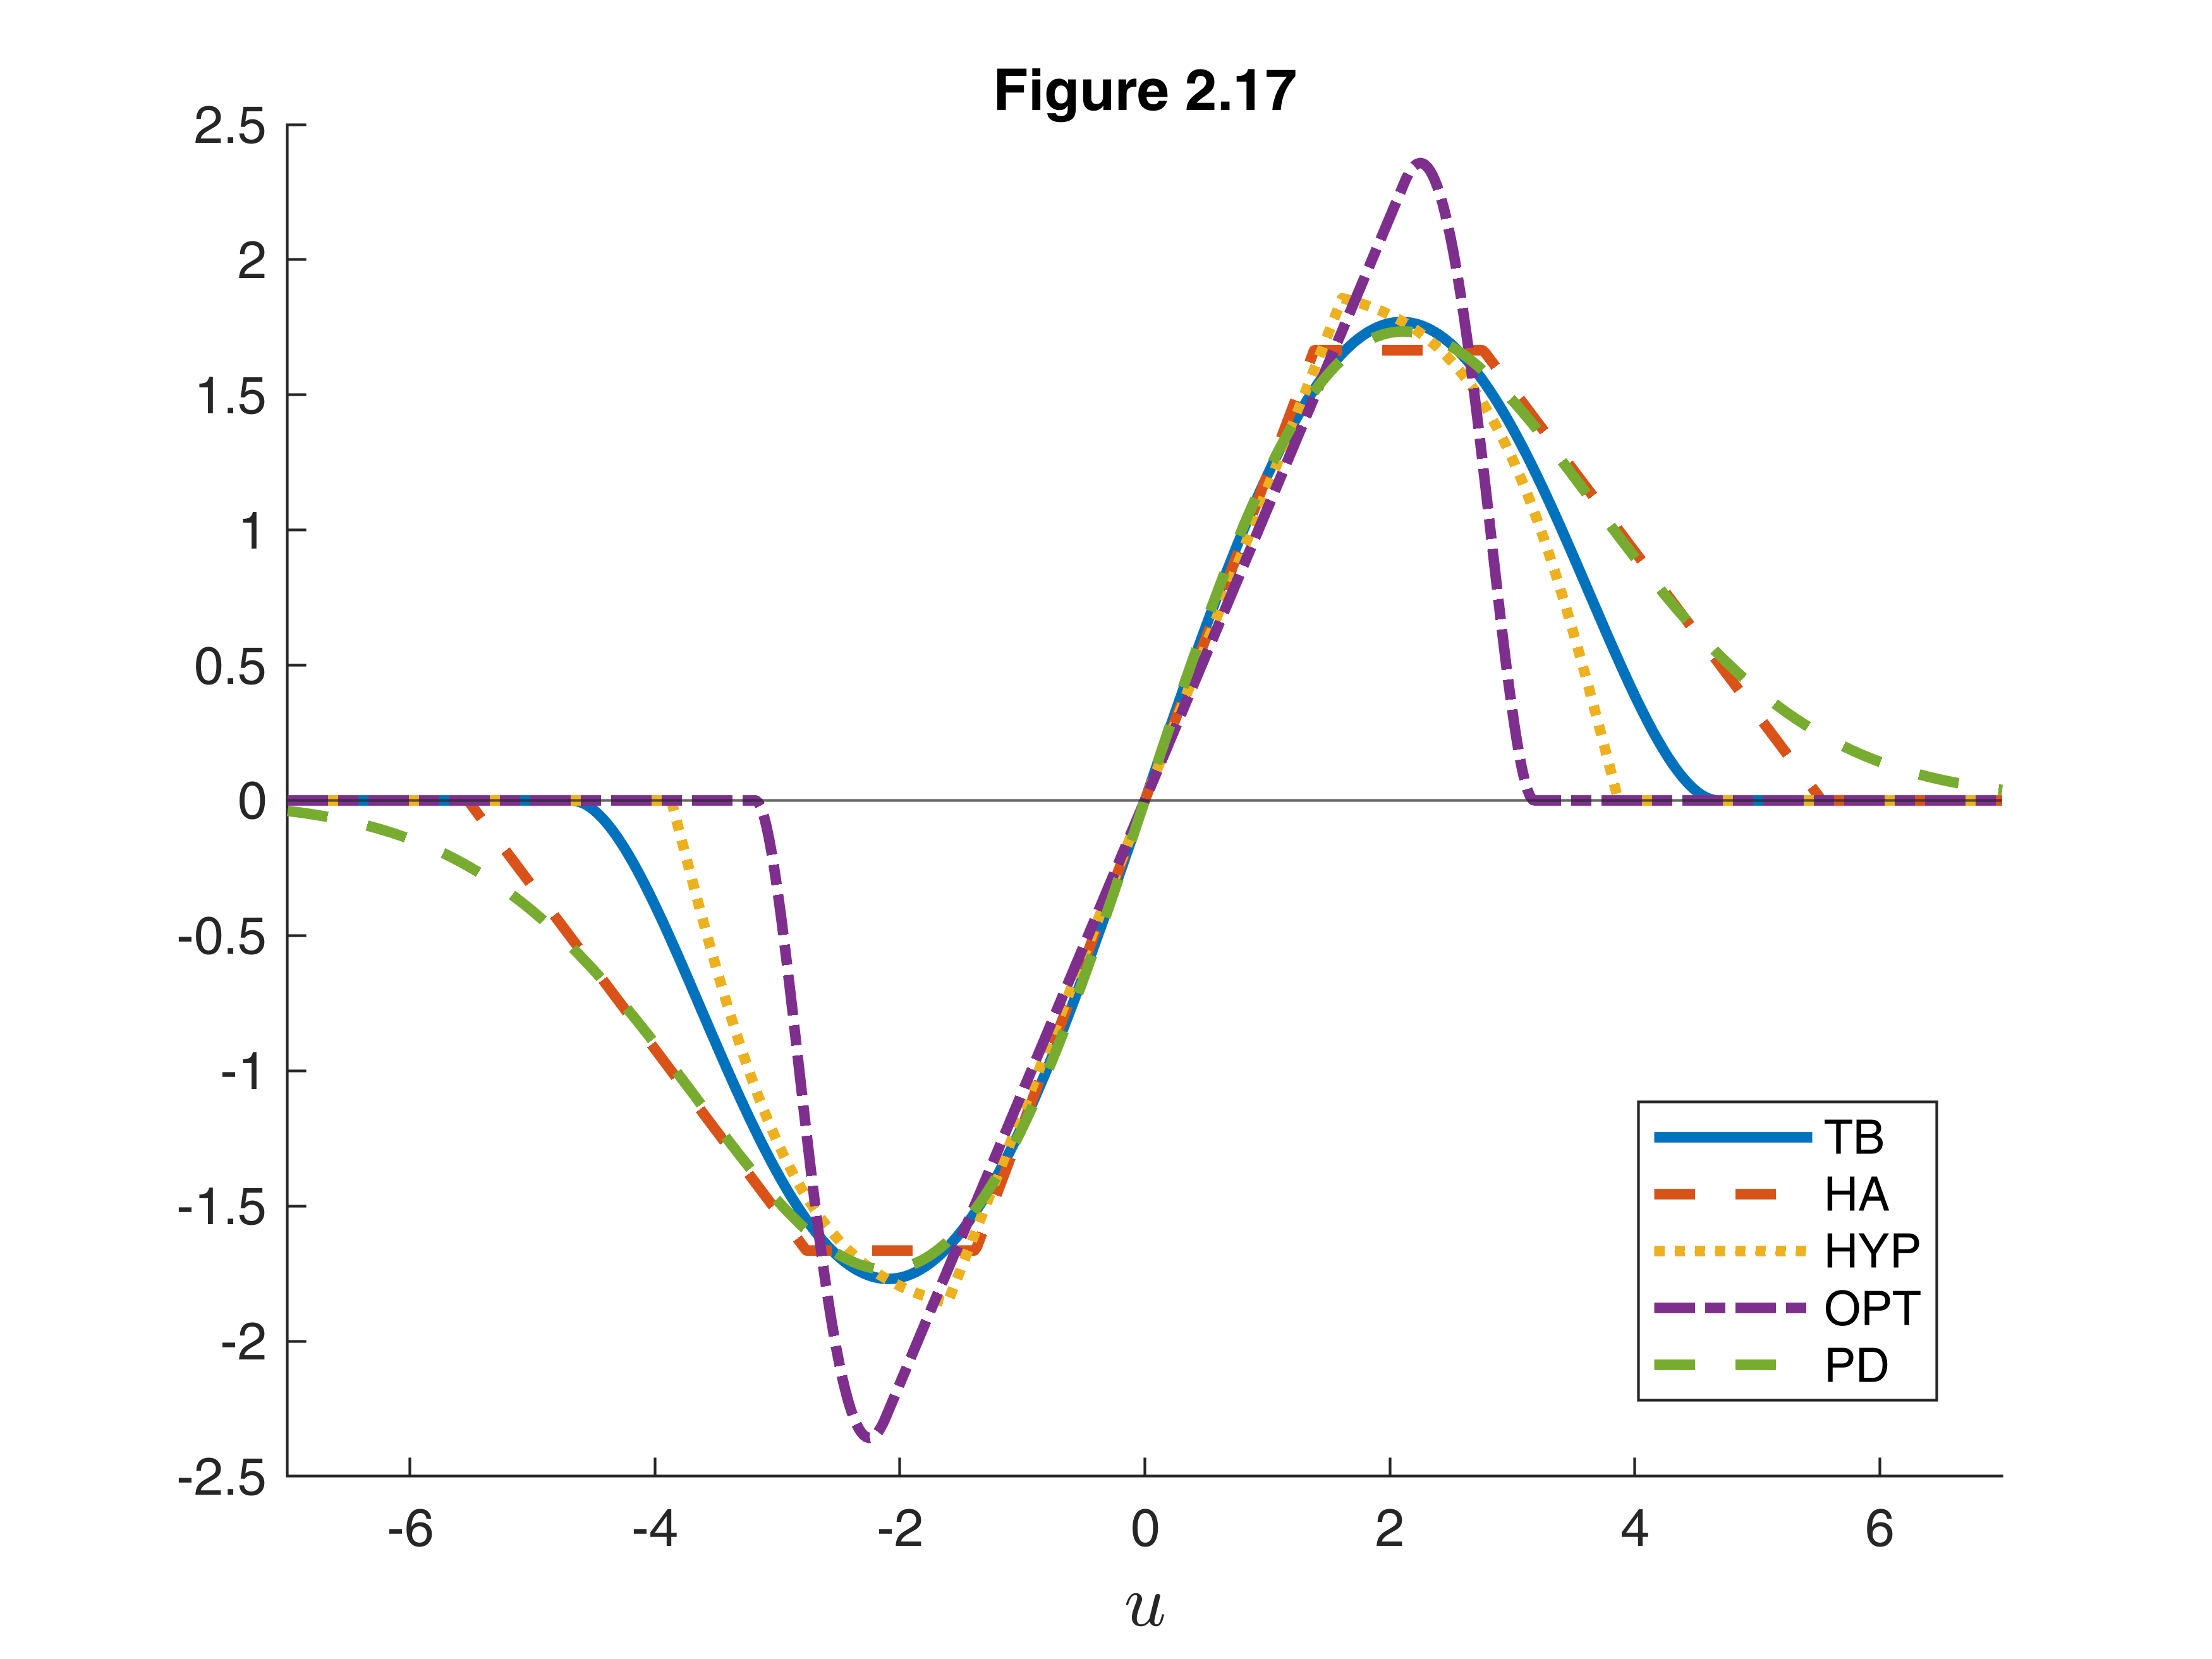

In [7]:
eff=0.95;

figure
% plot iF for different location estimators
hold('on')

ifTB=(TBpsi(x,cTB))/iTB;
plot(x,ifTB,'LineWidth',LineWidth,'LineStyle',linst{1})

ifHA=(HApsi(x,cHA))/iHA;
plot(x,ifHA,'LineWidth',LineWidth,'LineStyle',linst{2})

ifHYP=(HYPpsi(x,[cHYP,k,A,B,d]))/iHYP;
plot(x,ifHYP,'LineWidth',LineWidth,'LineStyle',linst{3})

ifOPT=(OPTpsi(x,cOPT))/iOPT;
plot(x,ifOPT,'LineWidth',LineWidth,'LineStyle',linst{4})

ifPD=(PDpsi(x,cPD))/iPD;
plot(x,ifPD,'LineWidth',LineWidth,'LineStyle',linst{5})

xlabel(' $u$ ','Interpreter','Latex','FontSize',FontSize)
% title('Tukey biweight','FontSize',FontSizetitl)

legend(["TB" "HA"  "HYP"  "OPT" "PD"],'Location','best','AutoUpdate','off')

% Table 2.1, column 3
GESloceff095=max([ifTB ifHA ifHYP ifOPT ifPD])';

xlim([xlim1 xlim2])
yline(0)
title('Figure 2.17')
set(gcf,"Name",'Figure 2.17')

In [8]:

disp('First two columns of Table 2.1')

First two columns of Table 2.1

In [9]:
namRow=["Median" "MADn" "Tukey biweight" "Hampel" "Hyperboloc" "Optimal" "Power divergence"];
namCol=["bdp=0.5" "eff=0.95"];
GESloceff095All=[NaN; NaN; GESloceff095];
GESlocbdp050All=[GESlocbdp050(1); NaN; GESlocbdp050(2:end)];
GESbdpeff=array2table([GESlocbdp050All GESloceff095All],"RowNames",namRow,"VariableNames",namCol);
disp(GESbdpeff)

                        bdp=0.5    eff=0.95
                        _______    ________
    Median              1.2533         NaN 
    MADn                   NaN         NaN 
    Tukey biweight      2.8499      1.7696 
    Hampel              2.6323      1.6647 
    Hyperboloc           2.542      1.8576 
    Optimal             3.8962      2.3575 
    Power divergence    2.8014      1.7345

In [10]:

if prin==1
    % print to postscript
    print -depsc IFloceff095.eps;
end

%InsideREADME